In [129]:
import re

import nltk

import sklearn
from sklearn.externals import joblib

import numpy as np
from os import listdir


from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

stemmer = SnowballStemmer(language='english', ignore_stopwords=True)
# tokenizer = RegexpTokenizer(r'[a-z\d]{2,}')
tokenizer = RegexpTokenizer(r'\s+', gaps=True)

In [130]:
doc_path = r'C:\Users\Artur_Zahreba\Desktop\WorkFusion\P&G\Approval By Email\Training Set\v5\Training Set\ALL_FIXED'

In [131]:
doc_types = sorted(listdir(doc_path))

doc_texts = []

for doc_type in doc_types:
    filenames = sorted(listdir(doc_path + '\\' + doc_type))
    filenames = filter(lambda x: re.search(r'\.txt$', x), filenames)
    for filename in filenames:
        with open(doc_path + '\\' + doc_type + '\\' + filename, 'r') as ffile:
            txt = ffile.read()
            doc_texts.append((doc_type, filename, txt))
            ffile.close()
            
print(len(doc_texts))

737


In [132]:
lables, fnames, texts = zip(*doc_texts)

In [133]:
texts[0]

'From: Liang, Anna\nSent: Wed May 17 10:05:28 CEST 2017\nTo: Chia, Ian; Nino, DaisyAnne; onetravelretail, Ion; Muthuraman, Alagammai\nCc: Tan, HerWen; Neo, Joyce; Eunice, Chiam\nSubject: : [Approval] NRO - Kingpower Tester request\nApprove\n\nAnna \n\n \n\n: Chia, Ian \n: 2017517 16:00\n: Nino, DaisyAnne <nino.d@pg.com>; onetravelretail, Ion\n<onetravelretail.im@pg.com>; Muthuraman, Alagammai\n<muthuraman.am@pg.com>\n: Tan, HerWen <tan.hw@pg.com>; Neo, Joyce <neo.j.1@pg.com>; Liang,\nAnna <liang.an.2@pg.com>; Eunice, Chiam <eunice.ec@pg.com>\n: RE: [Approval] NRO - Kingpower Tester request\n\n \n\nHi Anna,\n\n \n\nPlease approve attached NRO.\n\n \n\nHi Daisy,\n\n \n\nThanks!\n\n \n\nThank you!\n\nIan\n\n\n\nThe Metropolis, 11 North Buona Vista Drive, #21-07, The Metropolis\nTower 2, Singapore 138589\n\n \n\nOOO Date: 8  12 May 2017, please expect delayed response on enquiries\nand emails.\n\n \n\nAll decisions on pricing, promotion, distribution, assortment and\nshelving are at the so

In [134]:
texts = map(lambda x: stemmer.stem(x), texts)
texts = map(lambda x: tokenizer.tokenize(x), texts)
texts = map(lambda x: re.sub(r'\s\d+\s', ' ', ' '.join(x)), texts)
texts[0]

u'from: liang, anna sent: wed may 10:05:28 cest to: chia, ian; nino, daisyanne; onetravelretail, ion; muthuraman, alagammai cc: tan, herwen; neo, joyce; eunice, chiam subject: : [approval] nro - kingpower tester request approve anna : chia, ian : 16:00 : nino, daisyanne <nino.d@pg.com>; onetravelretail, ion <onetravelretail.im@pg.com>; muthuraman, alagammai <muthuraman.am@pg.com> : tan, herwen <tan.hw@pg.com>; neo, joyce <neo.j.1@pg.com>; liang, anna <liang.an.2@pg.com>; eunice, chiam <eunice.ec@pg.com> : re: [approval] nro - kingpower tester request hi anna, please approve attached nro. hi daisy, thanks! thank you! ian the metropolis, north buona vista drive, #21-07, the metropolis tower 2, singapore ooo date: 12 may 2017, please expect delayed response on enquiries and emails. all decisions on pricing, promotion, distribution, assortment and shelving are at the sole discretion of the retailer. this electronic message transmission contains information which may be confidential. the in

In [135]:
lable_dict = dict(zip(list(set(lables)), range(len(set(lables)))))
lables_int = map(lambda x: lable_dict[x], lables)

In [136]:
from sklearn.model_selection import train_test_split

train_ind, test_ind = train_test_split(range(len(texts)), test_size = 0.2, random_state=42)

In [137]:
X = np.array(texts)
y = np.array(lables_int)
D = np.array(fnames)

X_train = X[train_ind]
X_test = X[test_ind]
y_train = y[train_ind]
y_test = y[test_ind]

F_names = D[test_ind]

In [138]:
vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(
    sublinear_tf=False,
    
    max_df=0.9, 
    min_df=0.3, 
    
    use_idf=True, 
                                                             
    stop_words="english", 
    lowercase=True, 
    max_features=None,
                                                            
    strip_accents='unicode', 
    ngram_range=(1,2), 
    norm=u'l2',
                                                             
    smooth_idf=True, 
    token_pattern=r'[a-z\d]{2,}'
)

vectorizer.fit(X_train)

TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.9, max_features=None, min_df=0.3,
        ngram_range=(1, 2), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents='unicode', sublinear_tf=False,
        token_pattern='[a-z\\d]{2,}', tokenizer=None, use_idf=True,
        vocabulary=None)

In [139]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# Decision Tree Classifier

In [140]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_leaf_nodes=25)
# clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)
clf
# clf.feature_importances_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=25, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [141]:
X_train.shape

(589, 201)

In [142]:
X_test.shape

(148, 201)

In [143]:
predictions = clf.predict(X_test)

In [144]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.79729729729729726

### Errors

In [145]:
A_O = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == 1]
O_A = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == -1]

In [146]:
print('Approved to Other: ' + str(len(A_O)))
# A_O

Approved to Other: 15


In [147]:
print('Other to Approved: ' + str(len(O_A)))
# O_A

Other to Approved: 15


# Random Forest Classifier

In [148]:
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(n_estimators = 1000, max_leaf_nodes = 15)
clf = RandomForestClassifier(random_state=1)
clf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

Decision Tree Params:
class_weight=None,
criterion='gini',
max_depth=None,
max_features='auto',
max_leaf_nodes=None,
min_impurity_split=1e-07,
min_samples_leaf=1,
min_samples_split=2,
min_weight_fraction_leaf=0.0,

Number of trees in the ensemble:
n_estimators=10,



In [149]:
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.86486486486486491

### Errors

In [150]:
A_O = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == 1]
O_A = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == -1]

In [151]:
print('Approved to Other: ' + str(len(A_O)))
# A_O

Approved to Other: 13


In [152]:
print('Other to Approved: ' + str(len(O_A)))
# O_A

Other to Approved: 7


# Gradient Boosted Tree

In [153]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(
    max_depth=1,
    n_estimators=1000,
    warm_start=True,
    random_state=104
)
clf

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=1000, presort='auto', random_state=104,
              subsample=1.0, verbose=0, warm_start=True)

In [154]:
clf.fit(X_train.toarray(), y_train)
predictions = clf.predict(X_test.toarray())
accuracy_score(y_test, predictions)

0.86486486486486491

### Errors

In [155]:
A_O = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == 1]
O_A = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == -1]

In [156]:
print('Approved to Other: ' + str(len(A_O)))
# A_O

Approved to Other: 10


In [157]:
print('Other to Approved: ' + str(len(O_A)))
# O_A

Other to Approved: 10


# AdaBoost (sklearn)

In [158]:
from sklearn.ensemble import AdaBoostClassifier

In [159]:
clf = AdaBoostClassifier(
    base_estimator = DecisionTreeClassifier(max_depth=1),
    algorithm='SAMME',
    n_estimators=1000,
    random_state=104
)
clf

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=1000, random_state=104)

In [160]:
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.86486486486486491

### Errors

In [161]:
A_O = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == 1]
O_A = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == -1]

In [162]:
print('Approved to Other: ' + str(len(A_O)))
# A_O

Approved to Other: 10


In [163]:
print('Other to Approved: ' + str(len(O_A)))
# O_A

Other to Approved: 10


# XGBoost (sklearn)

In [164]:
from xgboost.sklearn import XGBClassifier 
clf = XGBClassifier(n_estimators = 1000)
clf

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [165]:
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.88513513513513509

### Errors

In [166]:
A_O = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == 1]
O_A = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == -1]

In [167]:
print('Approved to Other: ' + str(len(A_O)))
# A_O

Approved to Other: 6


In [168]:
print('Other to Approved: ' + str(len(O_A)))
# O_A

Other to Approved: 11


## HPO

In [169]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

In [170]:
space ={
    'n_estimators':hp.quniform('n_estimators',100,1000,1),
    'learning_rate':hp.quniform('learning_rate',0.025,0.5,0.025),
    'max_depth': hp.quniform('max_depth',1,13,1),
    'min_child_weight': hp.quniform('min_child_weight',1,6,1),
    'subsample': hp.quniform('subsample',0.5,1,0.05),
    'gamma':hp.quniform('gamma',0.5,1,0.05),
    'colsample_bytree':hp.quniform('colsample_bytree',0.5,1,0.05),
    'nthread':6,
    'silent':1
}

In [171]:
def score(params):
    params['n_estimators'] = int(params['n_estimators'])
    params['max_depth'] = int(params['max_depth'])

    clf = XGBClassifier(**params)
    
    clf = clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    return {'loss': 1 - accuracy_score(y_test, predictions), 'status': STATUS_OK}

In [172]:
trials = Trials()

In [173]:
best = fmin(score, space, algo = tpe.suggest, trials = trials, max_evals = 250)
best

{'colsample_bytree': 0.8,
 'gamma': 1.0,
 'learning_rate': 0.47500000000000003,
 'max_depth': 5.0,
 'min_child_weight': 3.0,
 'n_estimators': 171.0,
 'subsample': 0.55}

In [174]:
best['n_estimators'] = int(best['n_estimators'])
best['max_depth'] = int(best['max_depth'])

clf = XGBClassifier(**best)
clf = clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [175]:
accuracy_score(y_test, predictions)

0.95270270270270274

### Errors

In [176]:
A_O = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == 1]
O_A = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == -1]

In [177]:
print('Approved to Other: ' + str(len(A_O)))
# A_O

Approved to Other: 3


In [178]:
print('Other to Approved: ' + str(len(O_A)))
# O_A

Other to Approved: 4


# XGBoost

In [179]:
import numpy as np
import xgboost as xgb

In [180]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

In [181]:
params = {
    'objective':'binary:logistic',
    'max_depth':2,
    'silent':1,
    'eta':1
}

num_rounds = 5

In [182]:
bst = xgb.train(params, dtrain, num_rounds)

In [183]:
watchlist  = [(dtest,'test'), (dtrain,'train')] # native interface only
bst = xgb.train(params, dtrain, num_rounds, watchlist)

[0]	test-error:0.222973	train-error:0.195246
[1]	test-error:0.168919	train-error:0.134126
[2]	test-error:0.135135	train-error:0.110357
[3]	test-error:0.148649	train-error:0.089983
[4]	test-error:0.121622	train-error:0.076401


In [184]:
preds_prob = bst.predict(dtest)
preds_prob

array([ 0.15363337,  0.21899767,  0.01181291,  0.02885863,  0.14517722,
        0.07319494,  0.90725493,  0.13989983,  0.07319494,  0.26447749,
        0.15343449,  0.02885863,  0.01900788,  0.00905742,  0.51840162,
        0.90738362,  0.76218176,  0.01382405,  0.04873211,  0.14891458,
        0.01181291,  0.07126063,  0.52580065,  0.51840162,  0.6018827 ,
        0.44765916,  0.37509748,  0.03887101,  0.00905742,  0.00905742,
        0.14025453,  0.00905742,  0.02885863,  0.11091775,  0.51119131,
        0.28129286,  0.35506445,  0.00992917,  0.02841073,  0.10849049,
        0.13989983,  0.07887398,  0.41820234,  0.00905742,  0.07887398,
        0.00905742,  0.00905742,  0.04873211,  0.10760962,  0.00905742,
        0.13913651,  0.00905742,  0.18733233,  0.14025453,  0.43125173,
        0.05559278,  0.60224938,  0.45381191,  0.14517722,  0.00905742,
        0.01900788,  0.00905742,  0.90738362,  0.01382405,  0.05550496,
        0.02452156,  0.28129286,  0.01382405,  0.76218176,  0.01

In [185]:
predictions = preds_prob > 0.5 # threshold
correct = 0

for i in range(len(predictions)):
    if (y_test[i] == predictions[i]):
        correct += 1

print('Predicted correctly: {0}/{1}'.format(correct, len(predictions)))
print('Error: {0:.4f}'.format(1-correct/len(predictions)))

Predicted correctly: 130/148
Error: 1.0000


In [186]:
accuracy_score(y_test, predictions)

0.8783783783783784

### Errors

In [187]:
A_O = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == 1]
O_A = [pred[0] for pred in zip(F_names, y_test, predictions) if pred[1]-pred[2] == -1]

In [188]:
print('Approved to Other: ' + str(len(A_O)))
# A_O

Approved to Other: 10


In [189]:
print('Other to Approved: ' + str(len(O_A)))
# O_A

Other to Approved: 8


### Important Features

In [190]:
%matplotlib inline

import xgboost as xgb
import seaborn as sns
import pandas as pd

sns.set(font_scale = 1.5)

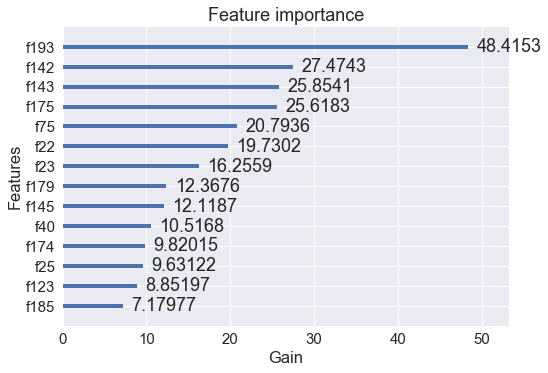

In [191]:
xgb.plot_importance(bst, importance_type='gain', xlabel='Gain')

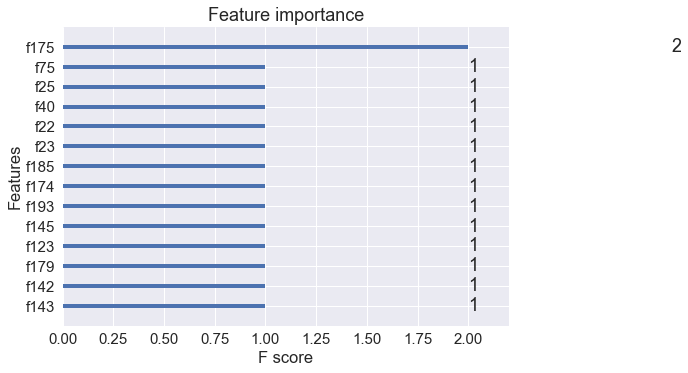

In [192]:
xgb.plot_importance(bst)

In [193]:
importances = bst.get_fscore()
importances

{'f123': 1,
 'f142': 1,
 'f143': 1,
 'f145': 1,
 'f174': 1,
 'f175': 2,
 'f179': 1,
 'f185': 1,
 'f193': 1,
 'f22': 1,
 'f23': 1,
 'f25': 1,
 'f40': 1,
 'f75': 1}

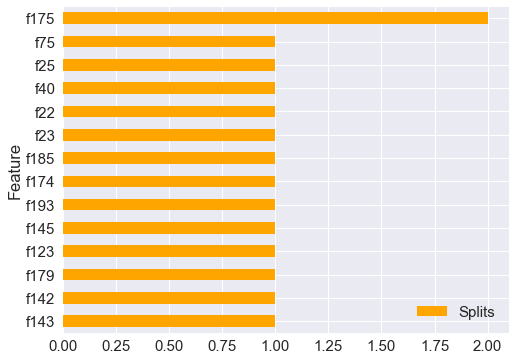

In [194]:
# create df
importance_df = pd.DataFrame({
        'Splits': list(importances.values()),
        'Feature': list(importances.keys())
    })
importance_df.sort_values(by='Splits', inplace=True)
importance_df.plot(kind='barh', x='Feature', figsize=(8,6), color='orange')

# GridSearch and XGBoost

In [195]:
import xgboost as xgb
from sklearn.grid_search import GridSearchCV

In [196]:
cv_params = {
    'max_depth': [3,5,7], 
    'min_child_weight': [1,3,5]
}

# maximum depth of the trees first, along with the min_child_weight, which is very similar to min_samples_split in sklearn’s version of gradient boosted trees

ind_params = {
    'learning_rate': 0.1,
    'n_estimators': 1000, 
    'seed':0, 
    'subsample': 0.8, 
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic'
}

optimized_GBM = GridSearchCV(
    xgb.XGBClassifier(**ind_params), 
    cv_params,
    scoring = 'accuracy',
    cv = 5,
    n_jobs = -1
)

In [197]:
optimized_GBM.fit(X_train, y_train) # 5-fold cross-validation and see which parameters perform the best

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=0.8),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [198]:
optimized_GBM.grid_scores_

[mean: 0.88455, std: 0.03838, params: {'max_depth': 3, 'min_child_weight': 1},
 mean: 0.88115, std: 0.03617, params: {'max_depth': 3, 'min_child_weight': 3},
 mean: 0.87606, std: 0.03201, params: {'max_depth': 3, 'min_child_weight': 5},
 mean: 0.88285, std: 0.03879, params: {'max_depth': 5, 'min_child_weight': 1},
 mean: 0.87606, std: 0.03183, params: {'max_depth': 5, 'min_child_weight': 3},
 mean: 0.86757, std: 0.03113, params: {'max_depth': 5, 'min_child_weight': 5},
 mean: 0.88795, std: 0.03635, params: {'max_depth': 7, 'min_child_weight': 1},
 mean: 0.87267, std: 0.02741, params: {'max_depth': 7, 'min_child_weight': 3},
 mean: 0.86757, std: 0.03113, params: {'max_depth': 7, 'min_child_weight': 5}]

In [199]:
cv_params = {
    'learning_rate': [0.1, 0.01], 
    'subsample': [0.7,0.8,0.9]
}
# subsampling along with lowering the learning rate to see if that helps

ind_params = {
    'n_estimators': 1000,
    'seed':0,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'max_depth': 3,
    'min_child_weight': 1
}


optimized_GBM = GridSearchCV(
    xgb.XGBClassifier(**ind_params),
    cv_params, 
    scoring = 'accuracy', 
    cv = 5, 
    n_jobs = -1
)

optimized_GBM.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=1000, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'subsample': [0.7, 0.8, 0.9], 'learning_rate': [0.1, 0.01]},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

In [200]:
optimized_GBM.grid_scores_

[mean: 0.88115, std: 0.03723, params: {'subsample': 0.7, 'learning_rate': 0.1},
 mean: 0.88455, std: 0.03838, params: {'subsample': 0.8, 'learning_rate': 0.1},
 mean: 0.87606, std: 0.03456, params: {'subsample': 0.9, 'learning_rate': 0.1},
 mean: 0.88285, std: 0.02100, params: {'subsample': 0.7, 'learning_rate': 0.01},
 mean: 0.87776, std: 0.03082, params: {'subsample': 0.8, 'learning_rate': 0.01},
 mean: 0.87097, std: 0.03034, params: {'subsample': 0.9, 'learning_rate': 0.01}]

## Early stopping CV 

In [201]:
xgdmat = xgb.DMatrix(X_train, y_train)
# create our DMatrix to make XGBoost more efficient

In [202]:
params = {
    'eta': 0.1,
    'seed':0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic', 
    'max_depth':3, 
    'min_child_weight':1
} 

# GridSearch CV optimized settings
cv_xgb = xgb.cv(
    params = params, 
    dtrain = xgdmat,
    num_boost_round = 3000, 
    nfold = 5,
    metrics = ['error'], # Make sure you enter metrics inside a list or you may encounter issues!
    early_stopping_rounds = 100) 

# Look for early stopping that minimizes error
# let’s be aggressive with the stopping and say we don’t want the accuracy to improve for at least 100 new trees

In [203]:
cv_xgb.tail(5)

,test-error-mean,test-error-std,train-error-mean,train-error-std
290,0.111111,0.032434,0.009829,0.002179
291,0.109402,0.032613,0.009829,0.002179
292,0.109402,0.029804,0.009829,0.002179
293,0.109402,0.029804,0.009829,0.002179
294,0.107692,0.027350,0.009829,0.002179


In [204]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 1.5)

In [205]:
params = {
    'eta': 0.1, 
    'seed':0, 
    'subsample': 0.8, 
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'max_depth':3,
    'min_child_weight':1
} 

bst = xgb.train(params, xgdmat, num_boost_round = 432)

### Important Features

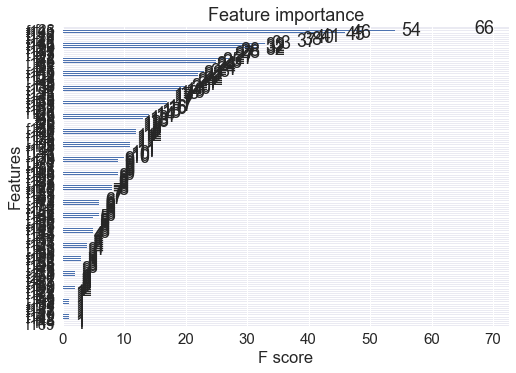

In [206]:
xgb.plot_importance(bst)

In [207]:
feature_imp = sorted(bst.get_fscore().items(), key = lambda x: x[1], reverse=True)
features, importances = zip(*feature_imp)

In [208]:
feature_dict = vectorizer.get_feature_names()
inv_feature_dict = dict(zip(map(lambda x: 'f'+ str(x), range(len(feature_dict))), feature_dict))
features_txt = []
for i in feature_imp:
    features_txt.append(inv_feature_dict[i[0]])
    print(inv_feature_dict[i[0]], ' ' * (30 - len(inv_feature_dict[i[0]])), i[1])

(u'approved', '                      ', 66)
(u'proceed', '                       ', 54)
(u'upcoming ooo', '                  ', 46)
(u'pm', '                            ', 45)
(u'nro', '                           ', 41)
(u'thank', '                         ', 40)
(u'approval', '                      ', 38)
(u'order', '                         ', 37)
(u'tr', '                            ', 33)
(u'muthuraman', '                    ', 32)
(u'kindly', '                        ', 32)
(u'ship', '                          ', 32)
(u'ion cc', '                        ', 28)
(u'subject approval', '              ', 28)
(u'com upcoming', '                  ', 27)
(u'approve', '                       ', 27)
(u'onetravelretail im', '            ', 27)
(u'liang', '                         ', 25)
(u'global', '                        ', 25)
(u'com tan', '                       ', 24)
(u'customer', '                      ', 24)
(u'dear', '                          ', 24)
(u'ii', '                       

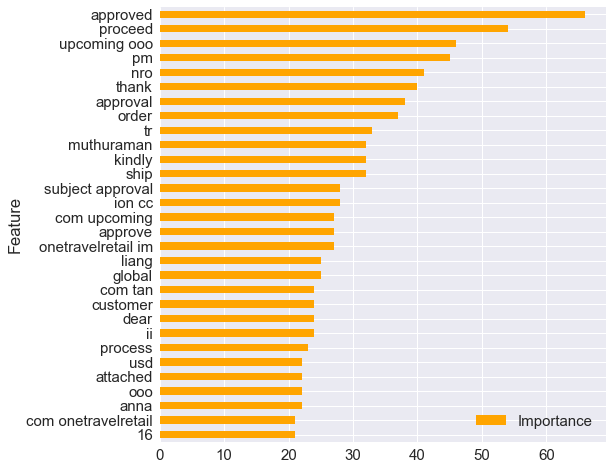

In [209]:
import pandas as pd
importance_frame = pd.DataFrame({'Importance': importances[:30], 'Feature': features_txt[:30]})
importance_frame.sort_values(by = 'Importance', inplace = True)
importance_frame.plot(kind = 'barh', x = 'Feature', figsize = (8,8), color = 'orange')